<a href="https://colab.research.google.com/github/divaamahajan/DataMining/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Kaggle to import DB**

In [ ]:
!pip install -q kaggle
!pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Loading the Libraries and Data**


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

# **Import data directly from kaggle to the colab notebook**
**PreRequisite:**
1. Go to your kaggle account, 
2. Scroll to API section 
3. Click Expire API Token to remove previous tokens. 
4. Click on Create New API Token - It will download kaggle. json file on your machine.
5. Make sure that you are logged in to your Kaggle account and that you have joined the competition. You can check this by visiting the competition page on Kaggle and verifying that the "Join Competition" button is replaced with "Your Submissions".


In [ ]:
from google.colab import files

# Upload the kaggle.json file that you downloaded in prereq
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyaamahajan","key":"0e5eb92c4aae7fd411f408cd68f5a1fc"}'}

In [ ]:
#Make directory name kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Download and extract the dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques -p /content
!unzip -q /content/house-prices-advanced-regression-techniques.zip -d /content/house-prices

100% 199k/199k [00:00<00:00, 720kB/s]
100% 199k/199k [00:00<00:00, 719kB/s]


#**Global Functions and Values**

In [ ]:
# Function to return metrics for linear regression
from sklearn.metrics import mean_squared_error, r2_score

def get_model_metrics(model_name, y_true, y_pred):
    metrics = {}
    metrics['Model'] = model_name
    metrics['MSE'] = mean_squared_error(y_true, y_pred)
    metrics['R-squared'] = r2_score(y_true, y_pred)
    
    return metrics


In [ ]:
#list to metrics of all tables
metrics_table = list()

# **Load Dataset**

**Primary object types:**
- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column


**Get dataframe**: 
Read CSV file from the 'data' subdirectory using a relative path.
*  `head() `will print the first 5 rows of the dataframe
*  `tail()` will print the last 5 rows) of the dataframe




In [ ]:
# reading the XLSX file
file_train =('/content/house-prices/train.csv')
file_test =('/content/house-prices/test.csv')
df = pd.read_csv(file_train)
df_test = pd.read_csv(file_test)
df_test_copy = df_test # to secure the origibal data
  
# displaying the contents of the XLSX file
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#check the shape(rowz X cols) of data
df.shape

(1460, 81)

**Observation** : We have a data with 1460 rows and 81 columns




# **Data Preprocessing**

##**Importance of Data Preprocessing stage**
1. Different ML models have different required input data (numerical data, images in specific format, etc). Without the right data, nothing will work.
2. Because of “bad” data, ML models will not give any useful results, or even may give wrong answers, that may lead to wrong decisions (GIGO principle).
3. The higher the quality of the data, the less data is needed.



**Stages of Data preprocessing**
1.  Data Cleaning
>* Removing duplicates
>* Removing irrelevant observations and errors
>* Removing unnecessary columns
>* Handling inconsistent data
>* Handling outliers and noise
2. Handling missing data

3. Data Integration

4. Data Transformation
>* Feature Construction
>* Handling skewness
>* Data Scaling
5. Data Reduction
>* Removing dependent (highly correlated) variables
>* Feature selection
>* PCA

## **Data Cleaning**

**Removing duplicates**

In [ ]:
#check the shape(rowz X cols) of data
df.shape

(1460, 81)

In [ ]:
df = df.drop_duplicates()
print(df.shape)

(1460, 81)


**Observation** : We still have a data with 1460 rows. Therefore, no duplicates found


**Changing the Index of a DataFrame**

A pandas Index enhances the capabilities of NumPy arrays to enable more flexible slicing and labeling. In many situations, it is advantageous to utilize the data's uniquely valued identifying field as its index, such as ID.

In [ ]:
# check if the selected column is unique
if df['Id'].is_unique: 
  # if true then update
  df = df.set_index('Id')
  df_test = df_test.set_index('Id')

In [ ]:
# Print the dataframe
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Observation** : Id is 100% unique and updated to be index

## **Data Transformation Part I**

### Transform catagorical data to numerical values

**find list of categorical data in dataframe**

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

**Transform categorical columns to numerical data using Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000


## **Removing unnecessary columns**

Let us first check the percent of uniqueness of each column

In [ ]:
col_list = list(df)
for i, col in enumerate(col_list):
  col_list[i] = (col, (len(df[col].unique())*100/df.shape[0]))

# sort the list based on the values in descending order
sorted_col = sorted(col_list, key=lambda x: x[1], reverse=True)

for col in sorted_col:
  print(f"{col[0]} : {col[1]:.2f}% unique")


LotArea : 73.49% unique
GrLivArea : 58.97% unique
BsmtUnfSF : 53.42% unique
1stFlrSF : 51.58% unique
TotalBsmtSF : 49.38% unique
SalePrice : 45.41% unique
BsmtFinSF1 : 43.63% unique
GarageArea : 30.21% unique
2ndFlrSF : 28.56% unique
MasVnrArea : 22.47% unique
WoodDeckSF : 18.77% unique
OpenPorchSF : 13.84% unique
BsmtFinSF2 : 9.86% unique
EnclosedPorch : 8.22% unique
YearBuilt : 7.67% unique
LotFrontage : 7.60% unique
GarageYrBlt : 6.71% unique
ScreenPorch : 5.21% unique
YearRemodAdd : 4.18% unique
Neighborhood : 1.71% unique
LowQualFinSF : 1.64% unique
MiscVal : 1.44% unique
3SsnPorch : 1.37% unique
Exterior2nd : 1.10% unique
MSSubClass : 1.03% unique
Exterior1st : 1.03% unique
TotRmsAbvGrd : 0.82% unique
MoSold : 0.82% unique
OverallQual : 0.68% unique
Condition1 : 0.62% unique
OverallCond : 0.62% unique
SaleType : 0.62% unique
Condition2 : 0.55% unique
HouseStyle : 0.55% unique
RoofMatl : 0.55% unique
BedroomAbvGr : 0.55% unique
PoolArea : 0.55% unique
BsmtFinType1 : 0.48% unique
B

**Observation** There is no highly unique valueLotFrontage    259
MasVnrArea       8
GarageYrBlt     81Lot fbdbbdxxxggggggg

## **Handling missing data**

Using `isna().sum()` function gives the sum of the null values preset in the dataset column-wise.

`fillna()` function will fill NA/NaN or 0 values in place of null spaces.
> `df["colName"].fillna("replacingValue", inplace = True)`




In [ ]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
cols_with_missing = df.columns[df.isna().sum() > 0].tolist()
cols_with_missing_df = df[cols_with_missing]
cols_with_missing_df.isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

**Observation**
* LotFrontage has 259 Null Values
* MasVnrArea has 8 Null Values
* GarageYrBlt has 81 Null Values

In [ ]:
cols_with_missing_test = df_test.columns[df_test.isna().sum() > 0].tolist()
#Changing Null values to 0
df[cols_with_missing] = df[cols_with_missing].fillna(0)
df_test[cols_with_missing_test] = df_test[cols_with_missing_test].fillna(0)

df.isna().sum()
# df = df.dropna()
# df.shape

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

## **Data Transformation Part II**

### **Standardization**

**min_max scaler** is a way to get data in the range 0 to 1

**StandardScaler** if you need -1 to 1 range. Scale each variable to have a mean of 0 and a standard deviation of 1

We use scaling so that each variable has equal importance when fitting the k-means algorithm. Otherwise, the variables with the widest ranges would have too much influence.

In [ ]:
df.shape

(1460, 80)

In [ ]:
#Importing required modules
from sklearn.preprocessing import MinMaxScaler

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_scaled = MinMaxScaler().fit_transform(df)
df_test_scaled = MinMaxScaler().fit_transform(df_test)

#view first five rows of scaled DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = list(df))
df_test_scaled =  pd.DataFrame(df_test_scaled, columns = list(df_test))
df_scaled.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.207668,0.033420,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,0.8,0.241078
1,0.000000,0.75,0.255591,0.038795,1.0,1.0,1.0,1.0,0.0,0.5,...,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,0.8,0.203583
2,0.235294,0.75,0.217252,0.046507,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,0.8,0.261908
3,0.294118,0.75,0.191693,0.038561,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.0,0.145952
4,0.235294,0.75,0.268371,0.060576,1.0,1.0,0.0,1.0,0.0,0.5,...,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,0.8,0.298709


In [ ]:
df_scaled.shape

(1460, 80)

## **Handling (drop) outliers**
    # Note: dropping is only one of techniques to handle with outliers


### Z-Score
* A **z-score** measures how many standard deviations a data point is from the mean in a distribution.
* A normal distribution is shown below and it is estimated that
>* outliers_threshold = 1: 68% of the data points lie between +/- 1 standard deviation.
>* outliers_threshold = 2: 95% of the data points lie between +/- 2 standard deviation
>* outliers_threshold = 3: 99.7% of the data points lie between +/- 3 standard deviation
>* outliers_threshold = 4: 99.9% of the data points lie between +/- 4 standard deviation
* We are removing all the rows above this outlier threshold

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_scaled, nan_policy='omit'))
z_scores.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073375,0.045532,0.212877,0.207142,0.064238,0.244717,0.750731,0.314667,0.02618,0.604670,...,0.068692,0.063305,0.457447,0.191594,0.087688,1.599111,0.138777,0.313867,0.208502,0.347273
1,0.872563,0.045532,0.645747,0.091886,0.064238,0.244717,0.750731,0.314667,0.02618,0.628316,...,0.068692,0.063305,0.457447,0.191594,0.087688,0.489110,0.614439,0.313867,0.208502,0.007288
2,0.073375,0.045532,0.299451,0.073480,0.064238,0.244717,1.378933,0.314667,0.02618,0.604670,...,0.068692,0.063305,0.457447,0.191594,0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,0.309859,0.045532,0.068587,0.096897,0.064238,0.244717,1.378933,0.314667,0.02618,1.861302,...,0.068692,0.063305,0.457447,0.191594,0.087688,1.599111,1.367655,0.313867,3.426284,0.515281
4,0.073375,0.045532,0.761179,0.375148,0.064238,0.244717,1.378933,0.314667,0.02618,0.628316,...,0.068692,0.063305,0.457447,0.191594,0.087688,2.100892,0.138777,0.313867,0.208502,0.869843


In [ ]:
outliers_threshold = 3
mask = (z_scores <= outliers_threshold).all(axis=1)
print(f" No. of outlier rows = {len(mask[mask == False])} from total {df_scaled.shape[0]} rows")

 No. of outlier rows = 906 from total 1460 rows


**Observation**:
outliers_threshold = 3 is almost slicing the data into half
Let's save more data and keep outliers_threshold = 4

In [ ]:
outliers_threshold = 4
mask = (z_scores <= outliers_threshold).all(axis=1)
print(f" No. of outlier rows = {len(mask[mask == False])} from total {df_scaled.shape[0]} rows")

 No. of outlier rows = 500 from total 1460 rows


**Observation:** From 1460 rows 500 rows are found to be outliers.

Let us remove these outliers.

In [ ]:
df_zscored = df_scaled[mask]
df_zscored.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.207668,0.033420,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,0.8,0.241078
1,0.000000,0.75,0.255591,0.038795,1.0,1.0,1.0,1.0,0.0,0.5,...,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,0.8,0.203583
2,0.235294,0.75,0.217252,0.046507,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,0.8,0.261908
4,0.235294,0.75,0.268371,0.060576,1.0,1.0,0.0,1.0,0.0,0.5,...,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,0.8,0.298709
6,0.000000,0.75,0.239617,0.041057,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.636364,0.25,1.0,0.8,0.377864


In [ ]:
df_zscored.shape

(960, 80)

We now have 960 rows of clean data


##**Visualising relation with label**

### Using Histogram

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



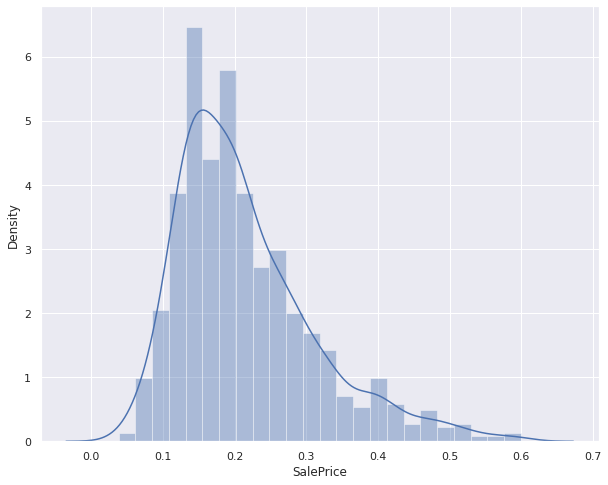

In [ ]:
#histogram
sns.distplot(df_zscored['SalePrice']);

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_scaled['SalePrice'].skew())
print("Kurtosis: %f" % df_scaled['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Observation**
* SalesPrice deviate from the normal distribution.
* SalesPrice has appreciable positive skewness.
* SalesPrice show peakedness

###Using Heatmap Correlation

The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

* 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

* 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

* -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

* 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

<AxesSubplot:>

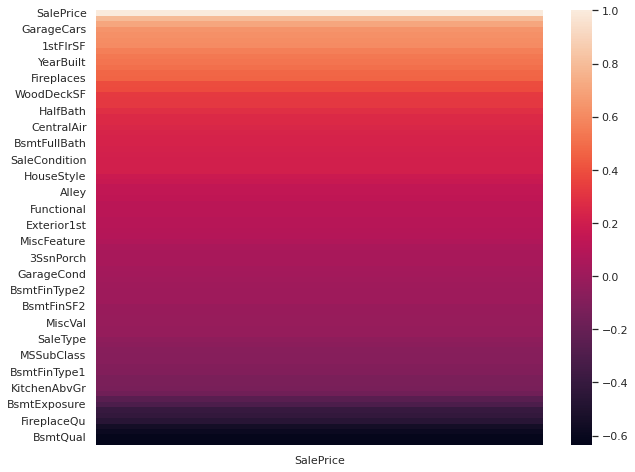

In [ ]:
# correlation matrix
corr = ((df_scaled.corr().iloc[:,-1]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr)

**Observation**
Below is the list of columns with **low** correlation with the label. ie. (-0.5 < corr < 0.5) . These are not good candidates for predictions

In [ ]:
corr[(corr["SalePrice"] > -0.5) & (corr["SalePrice"] < 0.5)]


,SalePrice
MasVnrArea,0.472614
Fireplaces,0.466929
BsmtFinSF1,0.386420
Foundation,0.382479
WoodDeckSF,0.324413
...,...
LotShape,-0.255580
BsmtExposure,-0.309043
HeatingQC,-0.400178
GarageType,-0.415283


**Observation**
Below is the list of columns with **high** correlation with the label. ie. (corr <= -0.5) or (corr >= 0.5) . These are good Candidates for predictions

In [ ]:
corr_high = corr[(corr["SalePrice"] <= -0.5) | (corr["SalePrice"] >= 0.5)]
corr_high

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


### Using seaborn

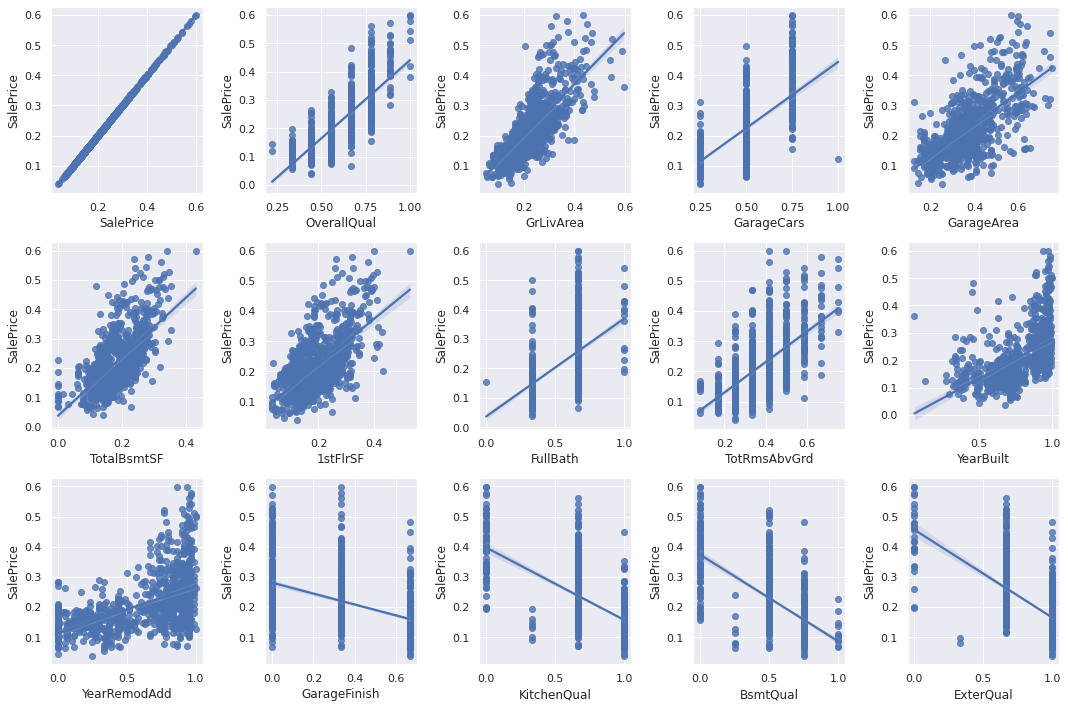

In [ ]:
cols_list = corr_high.index.tolist()
# sns.pairplot(df_zscored, x_vars= cols_list, y_vars='SalePrice', height=7, aspect=0.7, kind='reg')
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))

for i, col_name in enumerate(cols_list):
    row = i // 5
    col = i % 5
    sns.regplot(ax=axes[row, col], x=df_zscored[col_name], y=df_zscored['SalePrice'])
    axes[row, col].set_xlabel(col_name)
    axes[row, col].set_ylabel('SalePrice')
    
plt.tight_layout()
plt.show()



**Observation**: 
* It appears that "SalePrice" and "GrLivArea" are linearly connected. Both of the correlations are positive, so if one variable rises, the other rises as well. We can observe that the slope of the linear relationship is very steep in the case of "TotalBsmtSF".
* In addition to "SalePrice," "OverallQual" and "YearBuilt" appear to be connected. Sales prices rise in correlation with overall quality, and this link appears to be stronger in the case of "OverallQual".

## **Feature selection**

Let's select only the features with high correlation for our model_building

In [ ]:
df_featured = df_zscored[cols_list]
df_featured.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageFinish,KitchenQual,BsmtQual,ExterQual
0,0.241078,0.666667,0.259231,0.50,0.386460,0.140098,0.119780,0.666667,0.500000,0.949275,0.883333,0.333333,0.666667,0.5,0.666667
1,0.203583,0.555556,0.174830,0.50,0.324401,0.206547,0.212942,0.666667,0.333333,0.753623,0.433333,0.333333,1.000000,0.5,1.000000
2,0.261908,0.666667,0.273549,0.50,0.428773,0.150573,0.134465,0.666667,0.333333,0.934783,0.866667,0.333333,0.666667,0.5,0.666667
4,0.298709,0.777778,0.351168,0.75,0.589563,0.187398,0.186095,0.666667,0.583333,0.927536,0.833333,0.333333,0.666667,0.5,0.666667
6,0.377864,0.777778,0.256217,0.50,0.448519,0.275941,0.312070,0.666667,0.416667,0.956522,0.916667,0.333333,0.666667,0.0,0.666667


#**Model Building**

In [ ]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split
feature_cols = cols_list[1:-1]
X = df_zscored[feature_cols]
y = df_zscored['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In [ ]:
metrics_table = list()
from sklearn.linear_model import LinearRegression


# Create an instance of the model
linreg = LinearRegression()

#Train the model on the training data
linreg.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_linreg = linreg.predict(X_test)


## Interpreting model coefficients
1. **Slope Coefficient of determination** is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. It signifies how much change in y-variable is caused by a unit change in x-variable while holding other variables in the model constant. 
>* coefficient > 0: as the value of the independent variable increases, the mean of the dependent variable also tends to increase. 
>* coefficient < 0: as the independent variable increases, the dependent variable tends to decrease.
2. **Intercept** (sometimes called the “constant”) in a regression model represents the mean value of the response variable when all of the predictor variables in the model are equal to zero. 


In [ ]:
# print the intercept and coefficients
intercept = linreg.intercept_
slopes = linreg.coef_
print('intercept =' ,intercept)
print('slope coeff =' , list(zip(feature_cols, slopes)))
print(f"y = {intercept} ", end = ' ')
i = 0
for x in slopes:
  print(f'+ {x} * {feature_cols[i]}', end = ' ' )
  i += 1


# %fx"%(, slope))
# print('coeff col1  =' , linreg.coef_[0])
# print('coeff col2  =' , linreg.coef_[1])
# print('coeff col3  =' , linreg.coef_[2])



intercept = 0.0008787957531673773
slope coeff = [('OverallQual', 0.12912140370480063), ('GrLivArea', 0.47400168674229015), ('GarageCars', 0.002694350701192172), ('GarageArea', 0.09145246203239897), ('TotalBsmtSF', 0.21179900986994074), ('1stFlrSF', 0.07762264851547156), ('FullBath', -0.0470050181063337), ('TotRmsAbvGrd', 0.019451351150637577), ('YearBuilt', 0.031237960992433783), ('YearRemodAdd', 0.007938831960260934), ('GarageFinish', -0.004962563932488173), ('KitchenQual', -0.045427766339519976), ('BsmtQual', -0.051687978188324823)]
y = 0.0008787957531673773  + 0.12912140370480063 * OverallQual + 0.47400168674229015 * GrLivArea + 0.002694350701192172 * GarageCars + 0.09145246203239897 * GarageArea + 0.21179900986994074 * TotalBsmtSF + 0.07762264851547156 * 1stFlrSF + -0.0470050181063337 * FullBath + 0.019451351150637577 * TotRmsAbvGrd + 0.031237960992433783 * YearBuilt + 0.007938831960260934 * YearRemodAdd + -0.004962563932488173 * GarageFinish + -0.045427766339519976 * KitchenQual +

How do we interpret the **OverallQual coefficient** (0.1291)?

- For a given amount, **a "unit" increase in OverallQual spending** is associated with a **0.1291 "unit" increase in SalesPrice**.

Important notes:

- This is a statement of **association**, not **causation**.
- For an increase in GarageFinish spending is associated with a **decrease** in sales, as $\beta_1$ 0.04542 is **negative**.

#**Model Evaluation**

## MAE, MSE, RMSE


Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.
- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors
>average error.
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
- **Mean Squared Error** (MSE) is the mean of the squared errors
>"punishes" larger errors
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$ .
- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors
>interpretable in the "y" units.
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# define true and predicted response values
true = y_test
pred = y_pred_linreg

from sklearn import metrics
import numpy as np
print("Mean Absolute Error (MAE) = ", metrics.mean_absolute_error(true, pred))
print("Mean Squared Error (MSE) = ",metrics.mean_squared_error(true, pred))
print("Root Mean Squared Error (RMSE) = ",np.sqrt(metrics.mean_squared_error(true, pred)))

Mean Absolute Error (MAE) =  0.025935356486169733
Mean Squared Error (MSE) =  0.0013293627316119125
Root Mean Squared Error (RMSE) =  0.036460426925804264


## R-Squared R² and Variance

**R-Squared R²**  explains the percentage of variance in the outcome that is explained by the predictor variables (i.e., the information we do know). A perfect R² of 1.00 means that our predictor variables explain 100% of the variance in the outcome we are trying to predict.
`score() `Return the coefficient of determination of the prediction.

**Variance**
is a measure of how far observed values differ from the average of predicted values, i.e., their difference from the predicted value mean. The goal is to have a value that is low.



In [ ]:
varience_explained = ((true - pred)** 2).sum() #residual sum of squares
print("varience_explained = ", varience_explained)
total_variance = ((true - true.mean()) ** 2).sum() #total sum of squares
print("total_variance = ", total_variance)
r_squared = linreg.score(X_test,y_test)
print(f"R² = {r_squared}")
print(f"\nIt indicates that our predictions are {round(r_squared*100, 2)}% identical to the observed values")
print(f"There is {round(r_squared*100, 2)}% less variation around the regression line than the mean")
print(f"The X/Y relationship accounts for {round(r_squared*100, 2)}% of the variation")

varience_explained =  0.2552376444694872
total_variance =  2.0756329818294876
R² = 0.8770314180281922

It indicates that our predictions are 87.7% identical to the observed values
There is 87.7% less variation around the regression line than the mean
The X/Y relationship accounts for 87.7% of the variation


In [ ]:
#get the Performance metrics by method created above
metric_logreg = get_model_metrics(model_name="LinearRegression", y_true=true, y_pred = pred)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_logreg)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_logreg, orient='index', columns=['Value'])

,Value
Model,LinearRegression
MSE,0.001329
R-squared,0.877031


**Observation**: It indicates that our predictions are 87.7% identical to the observed values
There is 87.7% less variation around the regression line than the mean
The X/Y relationship accounts for 87.7% of the variation

#**Making Predictions on Test Data**

Predicting and converting them back to non-scaled versions

In [ ]:
#Calculate predictions on built Model of test data
y_pred_linreg = linreg.predict(df_test_scaled[feature_cols])

# Convert y_pred_linreg to DataFrame
y_pred_df = pd.DataFrame(y_pred_linreg, columns=['SalePrice'])

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the original SalePrice column to get the original scale of values
scaler.fit(df['SalePrice'].values.reshape(-1,1))

# Inverse transform the SalePrice column of y_pred_df to get the original scale of values
y_pred_df['Pred_SalePrice'] = scaler.inverse_transform(y_pred_df['SalePrice'].values.reshape(-1,1))

# View the converted column
y_pred_df.head()


,SalePrice,Pred_SalePrice
0,0.134229,131558.457596
1,0.204283,182004.229282
2,0.215662,190197.878729
3,0.226921,198305.958947
4,0.251446,215966.552056


Combining our dataset with predictions

In [ ]:


# # create a new DataFrame from y_pred with column name "Predicted to be SalesPrice"
# df_pred = pd.DataFrame(data=y_pred_df, columns=["Pred_SalesPrice"])

# concatenate df_test and df_pred column-wise
df_test_with_pred = pd.concat([df_test_copy.reset_index(drop=True), y_pred_df], axis=1).set_index('Id')
df_test_with_pred

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pred_SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0.134229,131558.457596
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0.204283,182004.229282
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0.215662,190197.878729
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2010,WD,Normal,0.226921,198305.958947
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,NaN,NaN,NaN,0,1,2010,WD,Normal,0.251446,215966.552056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2006,WD,Normal,0.076215,89782.599205
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0.097607,105186.661988
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0.185749,168658.195917


# **References**

[1] [Easiest way to download kaggle data in Google Colab](https://www.kaggle.com/general/74235)
